##**Importing**

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# For statistical tests
import scipy.stats as stats

In [3]:
# For spilliting the data and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
!pip install minisom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for minisom: filename=MiniSom-2.3.0-py3-none-any.whl size=9016 sha256=e226667219790f74f26ca54d521dc39b4ef945597504644370addb0dc19a5f80
  Stored in directory: /root/.cache/pip/wheels/6d/4e/9e/a95c14a232a196c22d9c04b221ff5d25461a1a4c55339c61db
Successfully built minisom


In [5]:
# for model building
import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from minisom import MiniSom

In [6]:
# For evaluation
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report
from sklearn.metrics import recall_score,precision_score

In [7]:
# For sampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Data Preprocessing

In [8]:
# Reading the data
df=pd.read_csv('DC.csv')

In [9]:
# First five rows
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,472,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4462,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6986,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,7519,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [10]:
# shape of the data
df.shape

(23199, 31)

In [11]:
# Info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23199 entries, 0 to 23198
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    23199 non-null  int64  
 1   V1      23199 non-null  float64
 2   V2      23199 non-null  float64
 3   V3      23199 non-null  float64
 4   V4      23199 non-null  float64
 5   V5      23199 non-null  float64
 6   V6      23199 non-null  float64
 7   V7      23199 non-null  float64
 8   V8      23199 non-null  float64
 9   V9      23199 non-null  float64
 10  V10     23199 non-null  float64
 11  V11     23199 non-null  float64
 12  V12     23199 non-null  float64
 13  V13     23199 non-null  float64
 14  V14     23199 non-null  float64
 15  V15     23199 non-null  float64
 16  V16     23199 non-null  float64
 17  V17     23199 non-null  float64
 18  V18     23199 non-null  float64
 19  V19     23199 non-null  float64
 20  V20     23199 non-null  float64
 21  V21     23199 non-null  float64
 22

In [12]:
# Checking for missing values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [13]:
# Checking for imbalance of the target variable
df.Class.value_counts()

0    22707
1      492
Name: Class, dtype: int64

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,23199.0,18876.956722,15941.705850,0.000000,6231.500000,19911.000000,28684.000000,170348.000000
V1,23199.0,-0.306740,2.067332,-30.552380,-0.987477,-0.306718,1.162499,2.132386
V2,23199.0,0.260021,1.638696,-40.978852,-0.356525,0.210878,0.881897,22.057729
V3,23199.0,0.618139,2.071346,-31.103685,0.263949,0.865329,1.502205,4.101716
V4,23199.0,0.321186,1.565433,-5.172595,-0.639543,0.241973,1.163114,12.114672
V5,23199.0,-0.223487,1.567255,-32.092129,-0.776257,-0.220021,0.326187,34.099309
V6,23199.0,0.060309,1.342106,-23.496714,-0.678106,-0.189552,0.468290,21.393069
V7,23199.0,-0.222488,1.725258,-43.557242,-0.616937,-0.076548,0.443342,34.303177
V8,23199.0,0.016946,1.616983,-41.484823,-0.168820,0.028483,0.292614,20.007208
V9,23199.0,0.478096,1.368454,-13.434066,-0.334662,0.441532,1.279265,10.392889


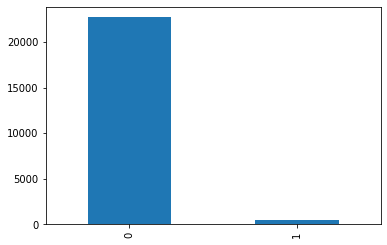

In [15]:
df.Class.value_counts().plot.bar()
plt.show()

##Normalizing Data

In [16]:
sc=StandardScaler()

In [17]:
df_new=pd.DataFrame()
for i in df.drop('Class',axis=1).columns:
  df_new[[i]]=sc.fit_transform(df[[i]])

In [18]:
df_new.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [19]:
df_new

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.158681,-0.970105,1.032533,-1.075647,2.348742,-0.190593,-1.107875,-1.341799,0.850189,-2.373667,...,0.125009,0.540127,0.148389,-0.783018,0.527492,-0.180989,0.287023,0.574145,-0.577509,-0.354057
1,-1.154541,-1.323861,-2.085439,0.227067,1.256841,1.010254,-0.838351,0.317676,-0.052407,-0.547381,...,3.126076,0.683069,0.846812,2.579400,-0.516617,0.352212,-0.332872,-0.615105,0.111714,2.190534
2,-0.904249,-0.965811,0.914910,-0.472111,1.283415,-0.381657,-0.101408,0.454903,-0.257332,-0.523485,...,-0.721082,-0.262729,-1.183576,0.382005,-0.165509,-0.635674,-1.094820,0.061393,-0.615054,0.800052
3,-0.745918,-1.979035,0.670270,-1.550225,1.506709,-0.577228,-1.316500,-1.897560,-0.164336,-0.530438,...,-0.328500,0.595875,0.463095,-0.730049,-0.107985,0.290133,-1.315119,-1.944229,3.244509,-0.070255
4,-0.712483,0.745409,1.684131,-2.376639,2.818201,2.455102,-1.056612,1.122136,-0.317453,-1.286847,...,-0.054028,-0.346737,-0.844833,-1.132912,-2.793331,3.092343,1.033036,-0.053345,0.539123,-0.349246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23194,0.850369,-0.018938,-0.255432,0.014922,-1.712579,-0.207955,0.406877,1.206635,-0.308147,0.317031,...,0.091677,-0.034097,0.493396,-0.188989,-1.408814,-0.166923,-0.215073,-0.794136,-1.986989,0.959318
23195,0.850369,-0.018938,-0.255432,0.014922,-1.712579,-0.207955,0.406877,1.206635,-0.308147,0.317031,...,0.091677,-0.034097,0.493396,-0.188989,-1.408814,-0.166923,-0.215073,-0.794136,-1.986989,0.959318
23196,0.850369,-0.054746,-0.326580,0.039913,-1.694280,-0.039988,0.273502,1.064274,-0.277409,0.327653,...,0.237170,0.000371,0.461924,-0.227498,-1.415197,-0.188342,-0.229785,-0.951107,-1.876639,0.675132
23197,0.850369,-0.054746,-0.326580,0.039913,-1.694280,-0.039988,0.273502,1.064274,-0.277409,0.327653,...,0.237170,0.000371,0.461924,-0.227498,-1.415197,-0.188342,-0.229785,-0.951107,-1.876639,0.675132


##Data Visualization

In [20]:
df_new['Class']=df['Class'].values

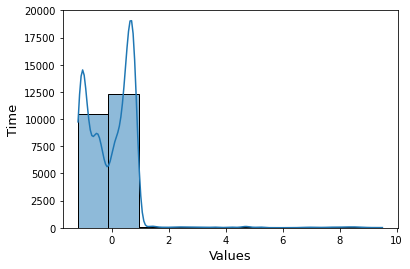

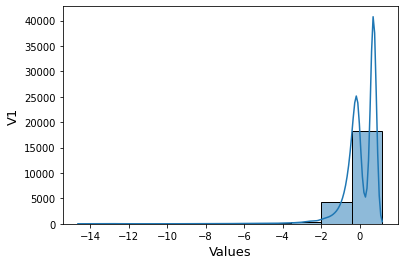

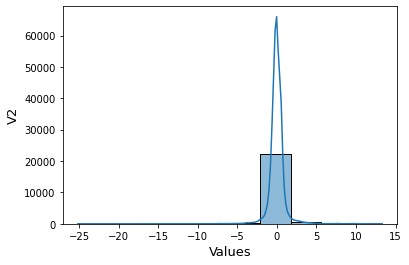

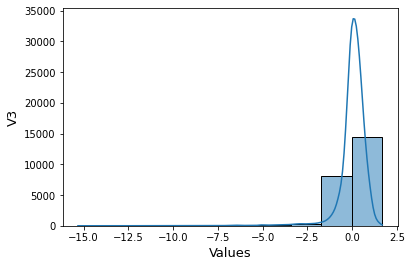

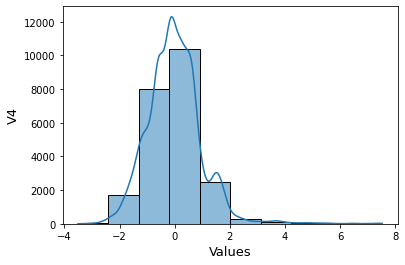

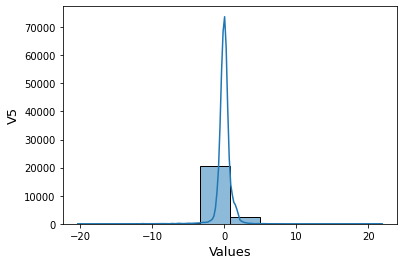

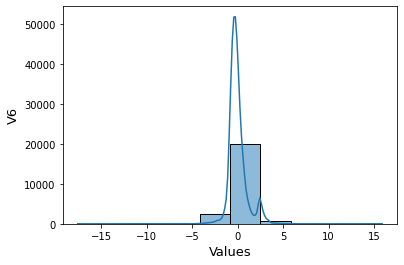

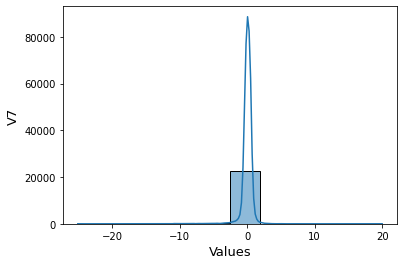

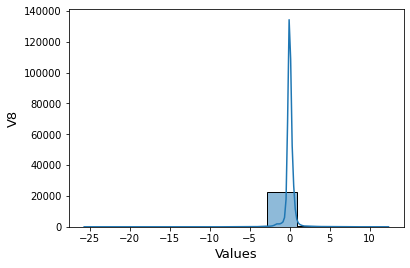

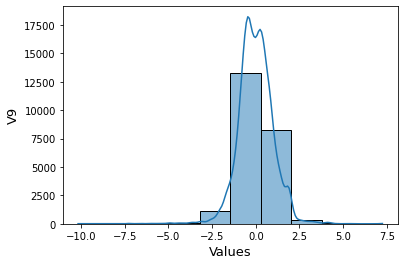

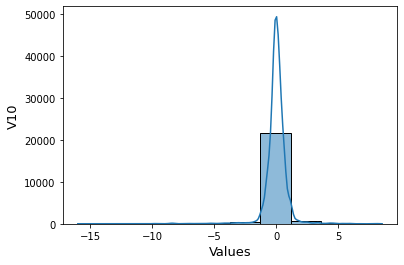

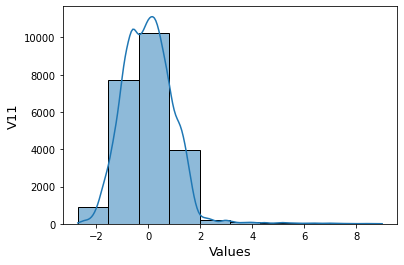

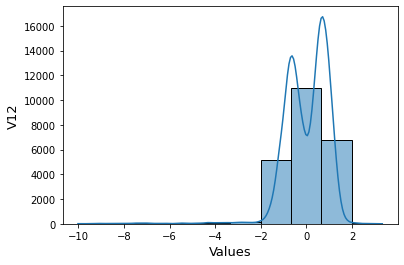

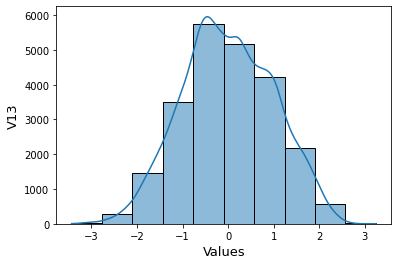

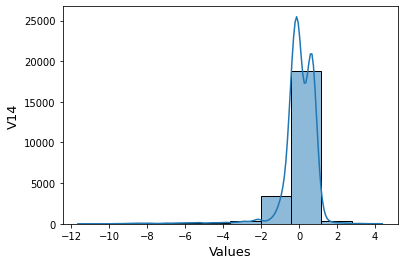

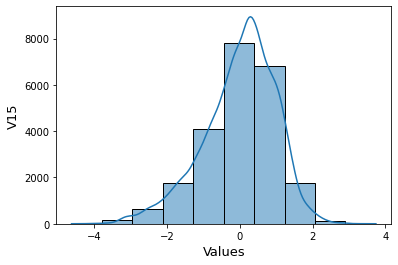

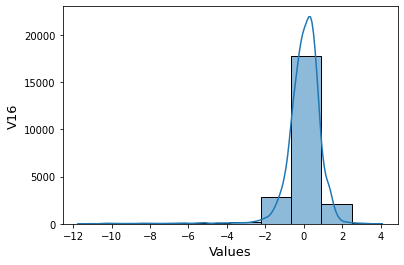

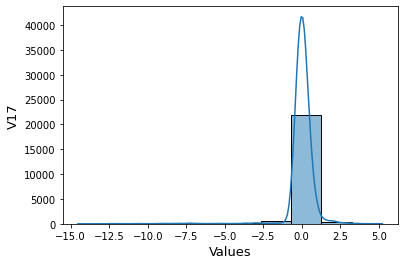

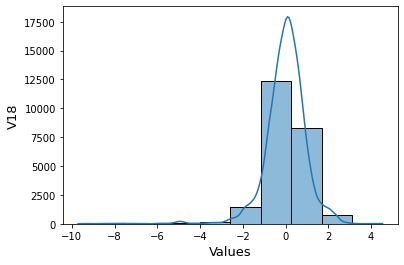

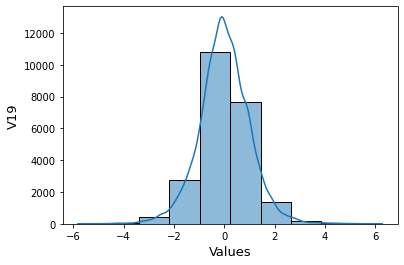

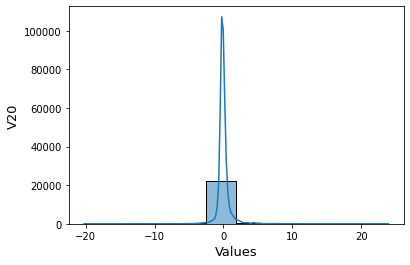

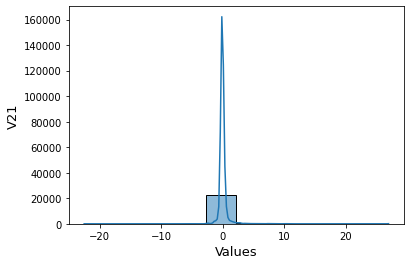

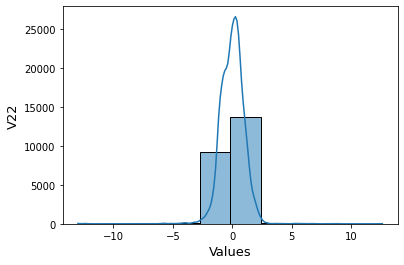

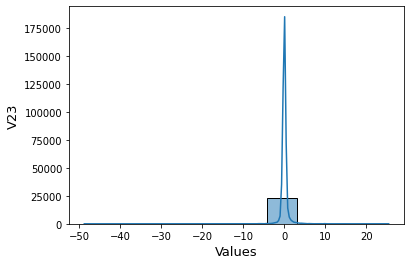

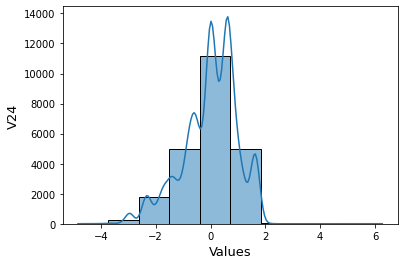

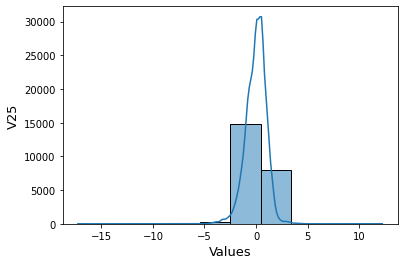

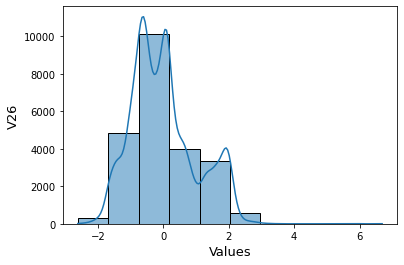

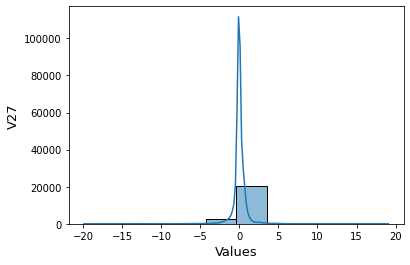

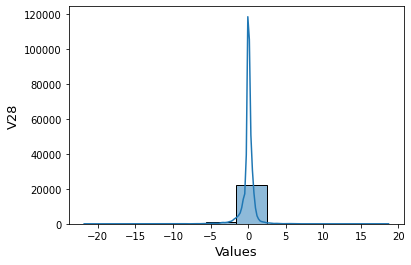

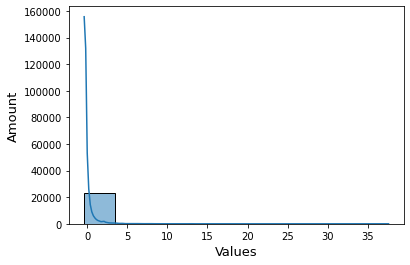

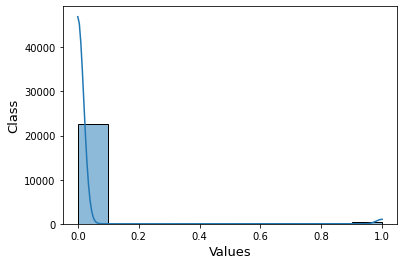

In [21]:
#checking the distribution of all the features in the dataset
for val in df_new.columns:
    sns.histplot(df_new[val], kde=True, bins=10)
    plt.ylabel(val.title(),fontsize=13)
    plt.xlabel("Values",fontsize=13)
    plt.show()

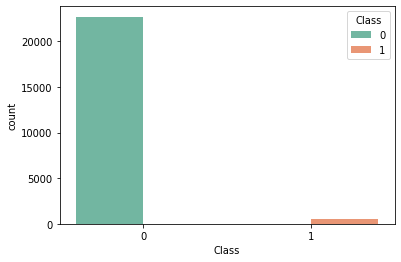

In [22]:
for val in df_new.columns:
    if len(df_new[val].unique()) ==2:
        sns.countplot(x='Class',
                     data=df_new,
                     hue=val,
                     palette='Set2' 
                     )
        plt.show()

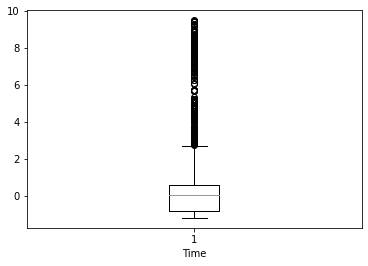

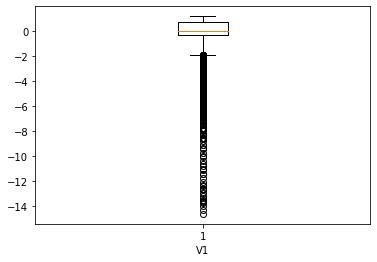

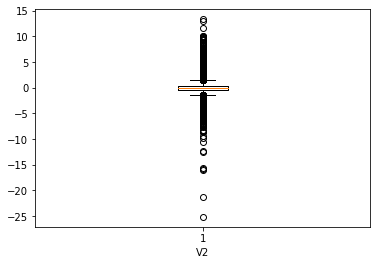

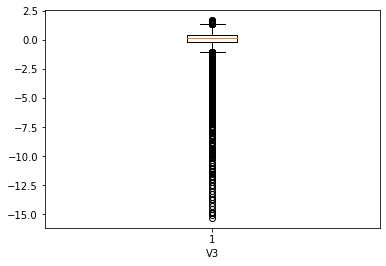

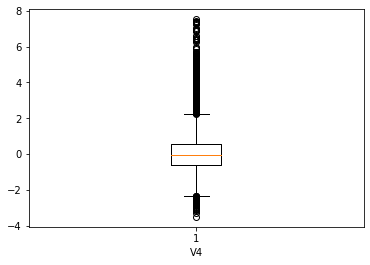

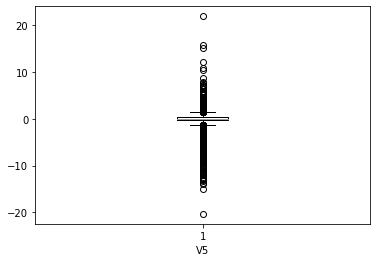

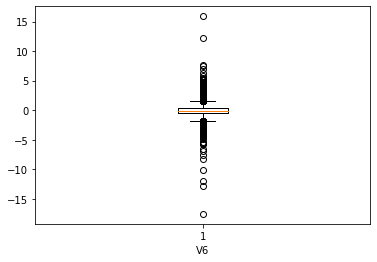

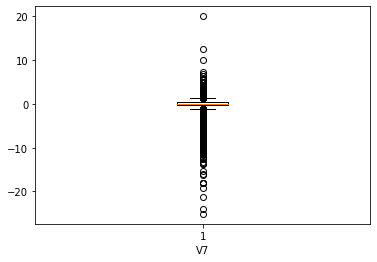

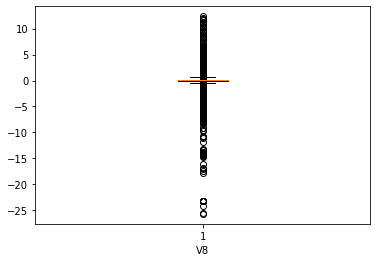

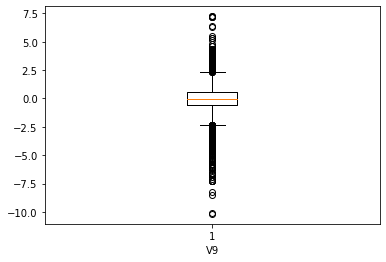

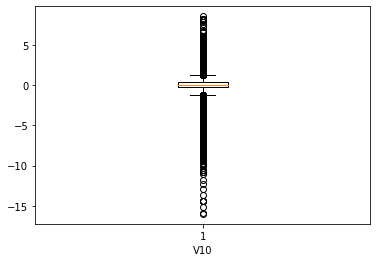

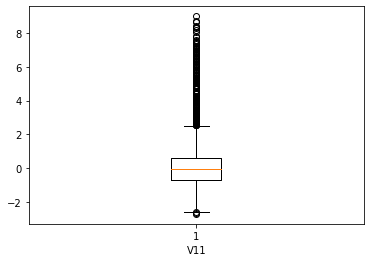

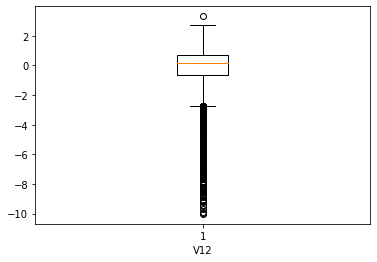

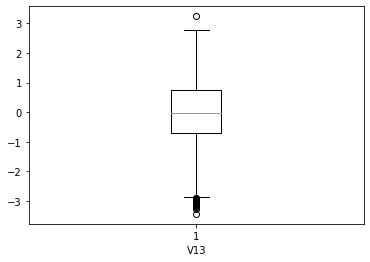

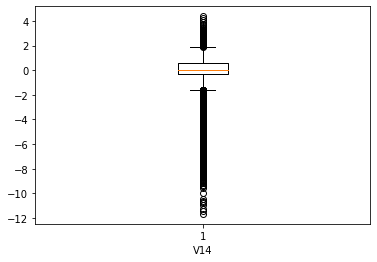

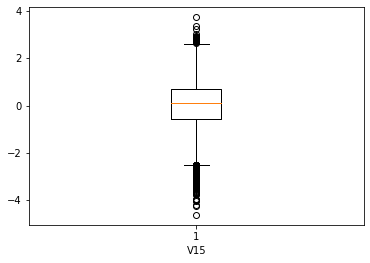

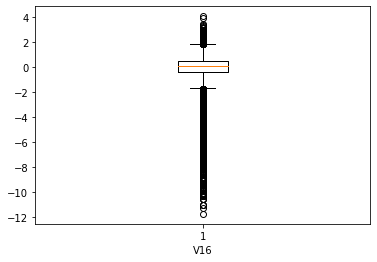

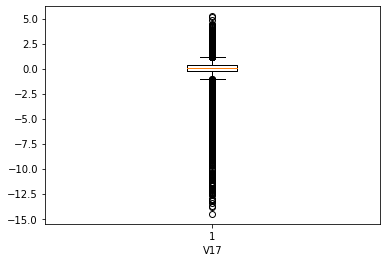

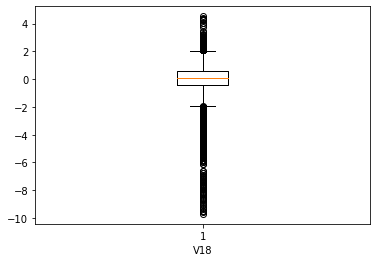

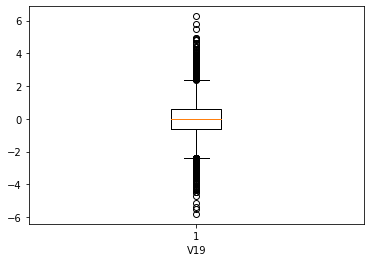

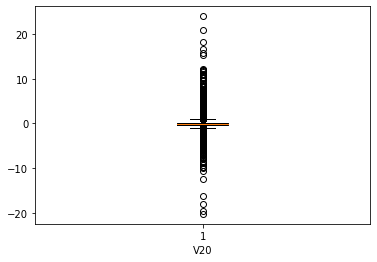

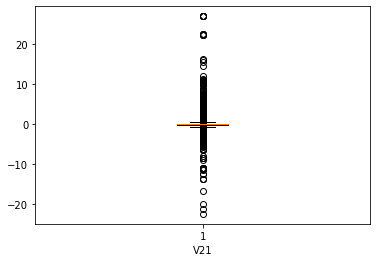

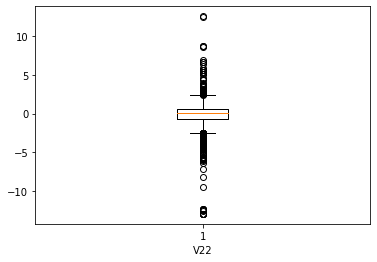

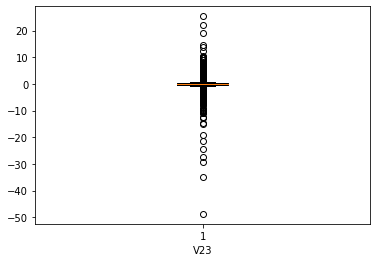

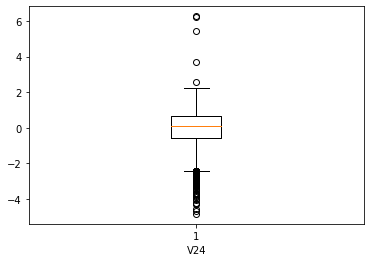

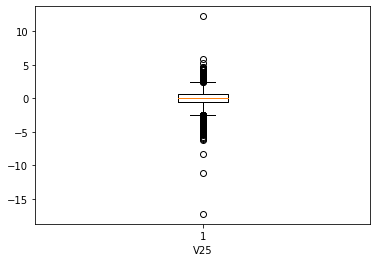

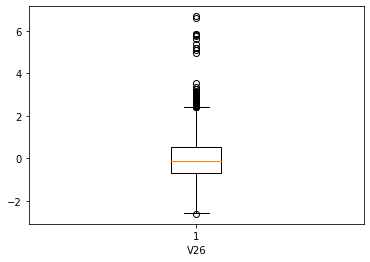

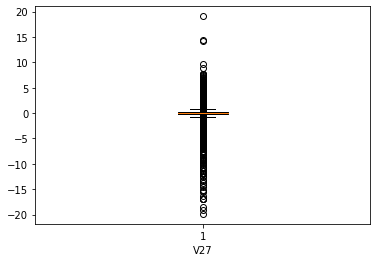

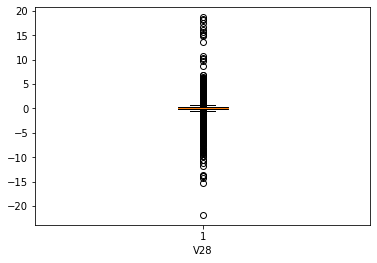

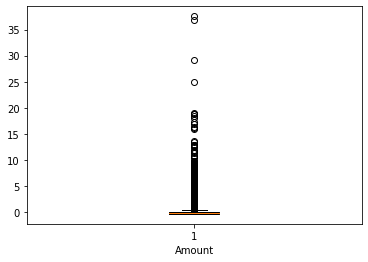

In [23]:
import matplotlib.pyplot as plt
for val in df_new.drop('Class',axis=1).columns:
  plt.boxplot(df_new[val])
  plt.xlabel(val)
  plt.show()

## Problem Statement

Here I am working on a classification problem. Here the class label is "Class". Other features are V1, V2, … V28, 'Time' and 'Amount'. Here I choose model performance based on Accuracy, Recall, F1 Score and Confusion Matrix.

# Feature Selection

In [24]:
# Taking significance level at 0.05

st_df=pd.DataFrame() # Here I am making an empty dataframe to store name of feature and pvalue
st_df['Feature']=df_new.drop(columns='Class').columns
pvalue=[]

for i in df_new.drop(columns='Class').columns:
    class_1=df_new.loc[df.Class==1,i]
    class_0=df_new.loc[df.Class==0,i]
    pvalue.append(stats.ttest_ind(class_1,class_0)[1])

st_df['Pvalue']=pvalue

In [25]:
#Selected features
ft_select=st_df.loc[st_df.Pvalue<0.05]['Feature'].values

# Base Model

In [26]:
# Here I am proceeding with a base model of linear regression
# Splitting the data
x=df_new[ft_select]
y=df_new.Class
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,stratify=y)

In [27]:
x_train.shape,x_test.shape

((16239, 28), (6960, 28))

In [28]:
# Scaling the data
sc=StandardScaler()
x_train_s=pd.DataFrame(sc.fit_transform(x_train),columns=x_train.columns)
x_test_s=pd.DataFrame(sc.transform(x_test),columns=x_test.columns)

In [29]:
# Here I am adding a constant column in x_train and x_test
x_train_s=sm.add_constant(x_train_s)
x_test_s=sm.add_constant(x_test_s)

In [30]:
y_train=y_train.reset_index().drop(columns='index')
y_test=y_test.reset_index().drop(columns='index')

In [31]:
# before model bulding we will build an evaluation function

def evaluation(y_test,y_pred):
    
    print('Accuracy Score is:',accuracy_score(y_test,y_pred))
    print('f1_score is:',f1_score(y_test,y_pred))
    print('Precision is:',precision_score(y_test,y_pred))
    print('Recall is:',recall_score(y_test,y_pred))
    print('Classification report:\n',classification_report(y_test,y_pred))
    con_mat=confusion_matrix(y_test,y_pred)
    ConfusionMatrixDisplay(con_mat).plot()
    plt.title('Confusion matrix for the given prediction')
    plt.show()
    
# Now we have our evaluation function

In [32]:
# Fitting a model
base_model=sm.Logit(y_train,x_train_s).fit()
y_pred_proba=base_model.predict(x_test_s)

Optimization terminated successfully.
         Current function value: 0.011272
         Iterations 14


In [33]:
# Summary of the model
base_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:                16239
Model:                          Logit   Df Residuals:                    16210
Method:                           MLE   Df Model:                           28
Date:                Mon, 05 Dec 2022   Pseudo R-squ.:                  0.8902
Time:                        21:59:55   Log-Likelihood:                -183.04
converged:                       True   LL-Null:                       -1666.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.7920      0.593    -16.521      0.000     -10.954      -8.630
Time           3.8838      0.374     10.375      0.000       3.150       4.618
V1             0.0929      0.276      0.337      0.736      -0.448       0.634
V2            -0.0480      0.371     -0.129      0.897      -0.775       0.679
V3             0.9381      0.468      2.006      0.045       0.021       1.855
V4             1.8292      0.367      4.986      0.000       1.110       2.548
V5            -1.0790      0.589     -1.833      0.067      -2.233       0.075
V6            -0.9619      0.571     -1.684      0.092      -2.081       0.157
V7             0.0388      0.326      0.119      0.905      -0.601       0.678
V8            -0.0966      0.512     -0.189      0.850      -1.100       0.907
V9            -0.5006      0.351     -1.428      0.153      -1.188       0.187
V10           -0.5690      0.366     -1.553      0.121      -1.287       0.149
V11            0.2501      0.222      1.128      0.259      -0.185       0.685
V12           -0.4961      0.289     -1.719      0.086      -1.062       0.070
V13            0.1237      0.213      0.580      0.562      -0.294       0.542
V14           -0.7520      0.270     -2.786      0.005      -1.281      -0.223
V15            0.1788      0.225      0.795      0.427      -0.262       0.620
V16            0.6167      0.360      1.714      0.087      -0.089       1.322
V17            0.5509      0.258      2.133      0.033       0.045       1.057
V18           -0.0790      0.302     -0.262      0.794      -0.671       0.513
V19           -0.0369      0.200     -0.185      0.853      -0.428       0.354
V20           -0.2806      0.174     -1.612      0.107      -0.622       0.061
V21            0.4603      0.305      1.511      0.131      -0.137       1.057
V22            0.0985      0.275      0.358      0.721      -0.441       0.638
V24           -0.7364      0.415     -1.773      0.076      -1.551       0.078
V25           -0.1495      0.171     -0.874      0.382      -0.485       0.186
V27           -0.6252      0.114     -5.480      0.000      -0.849      -0.402
V28           -0.2237      0.080     -2.780      0.005      -0.381      -0.066
Amount         0.0371      0.347      0.107      0.915      -0.642       0.716
==============================================================================

Possibly complete quasi-separation: A fraction 0.55 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [34]:
y_pred=[]
# Taking threshold for probability at 0.5
for i in y_pred_proba:
    if i>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

Accuracy Score is: 0.9969827586206896
f1_score is: 0.926829268292683
Precision is: 0.9568345323741008
Recall is: 0.8986486486486487
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6812
           1       0.96      0.90      0.93       148

    accuracy                           1.00      6960
   macro avg       0.98      0.95      0.96      6960
weighted avg       1.00      1.00      1.00      6960



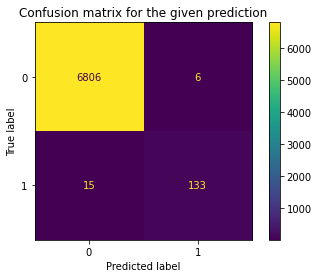

In [35]:
# Evaluating the model
evaluation(y_test,y_pred)

#### Here we can observe that we get an excellent accuracy score of 99.9% but recall score is low. This due to the high imbalance in the target class. Now I will try some undersampling techniques to see if we can counter this.

#Different Models


# SMOTE

In [36]:
#Underampling the data
x_train_sampled,y_train_sampled=RandomUnderSampler().fit_resample(x_train_s,y_train)

In [37]:
# we now have an Undersampled training set
# We will apply the Logistic regression model again

In [38]:
model=sm.Logit(y_train_sampled,x_train_sampled).fit()

Optimization terminated successfully.
         Current function value: 0.035683
         Iterations 15


In [39]:

y_pred_proba=model.predict(x_test_s)

In [40]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:                  688
Model:                          Logit   Df Residuals:                      659
Method:                           MLE   Df Model:                           28
Date:                Mon, 05 Dec 2022   Pseudo R-squ.:                  0.9485
Time:                        21:59:55   Log-Likelihood:                -24.550
converged:                       True   LL-Null:                       -476.89
Covariance Type:            nonrobust   LLR p-value:                1.962e-172
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.6724      5.086     -1.509      0.131     -17.640       2.295
Time           4.4225      1.059      4.177      0.000       2.347       6.498
V1            -1.8609      0.940     -1.979      0.048      -3.704      -0.018
V2            -3.4806      2.092     -1.664      0.096      -7.581       0.619
V3            -0.3226      8.580     -0.038      0.970     -17.139      16.494
V4             3.4669      3.900      0.889      0.374      -4.177      11.110
V5            -2.5417      8.773     -0.290      0.772     -19.736      14.652
V6             0.4132     12.234      0.034      0.973     -23.565      24.391
V7             2.0809      1.556      1.337      0.181      -0.969       5.131
V8            -1.5595      3.335     -0.468      0.640      -8.097       4.978
V9            -1.0563      1.021     -1.035      0.301      -3.058       0.945
V10           -3.7179      1.567     -2.372      0.018      -6.789      -0.646
V11            0.1507      1.883      0.080      0.936      -3.539       3.841
V12           -1.4569      2.562     -0.569      0.570      -6.479       3.565
V13            0.6571      0.753      0.873      0.383      -0.818       2.132
V14           -0.3750      0.885     -0.424      0.672      -2.110       1.360
V15            1.2703      1.161      1.094      0.274      -1.006       3.546
V16            1.3334      1.365      0.977      0.328      -1.341       4.008
V17            0.4772      1.741      0.274      0.784      -2.936       3.890
V18            0.5894      1.320      0.447      0.655      -1.998       3.176
V19            0.1709      0.674      0.254      0.800      -1.149       1.491
V20           -0.7788      1.155     -0.674      0.500      -3.042       1.485
V21            0.6787      0.963      0.705      0.481      -1.208       2.565
V22            0.3142      1.165      0.270      0.787      -1.969       2.598
V24           -0.6845      7.974     -0.086      0.932     -16.314      14.945
V25           -0.2720      0.563     -0.483      0.629      -1.376       0.831
V27           -0.9262      0.532     -1.743      0.081      -1.968       0.116
V28           -0.6328      0.564     -1.123      0.261      -1.737       0.472
Amount        -2.6687      2.007     -1.330      0.184      -6.603       1.265
==============================================================================

Possibly complete quasi-separation: A fraction 0.60 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [41]:
y_pred=[]

# Taking threshold for probability at 0.5
for i in y_pred_proba:
    if i>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

Accuracy Score is: 0.9706896551724138
f1_score is: 0.5836734693877551
Precision is: 0.41812865497076024
Recall is: 0.9662162162162162
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98      6812
           1       0.42      0.97      0.58       148

    accuracy                           0.97      6960
   macro avg       0.71      0.97      0.78      6960
weighted avg       0.99      0.97      0.98      6960



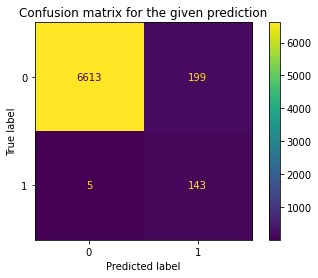

In [42]:
# Evaluation of the model
evaluation(y_test,y_pred)

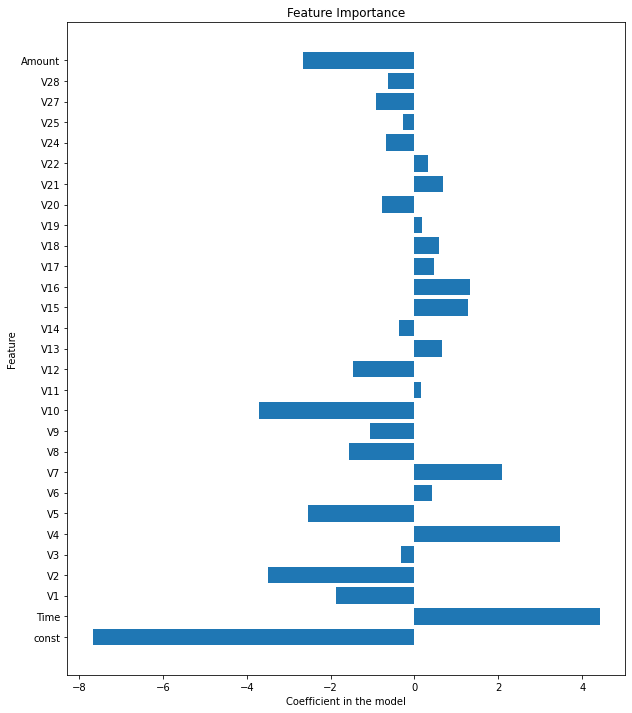

In [43]:
plt.rcParams['figure.figsize']=[10,12]
plt.barh(y=model.params.index,width=model.params.values)
plt.title('Feature Importance')
plt.ylabel('Feature')
plt.xlabel('Coefficient in the model')
plt.show()

#### Here we can observe that our recall score has improved considerably in case of a Logistic Regression model. I will further see whether my model can be improved with some tree based models.

# Decision Tree

In [44]:
# Since we are using decision tree we won't be needing to scale the split

In [45]:
# We will use smote to resample the data again using undersampler
x_train_sampled,y_train_sampled=RandomUnderSampler().fit_resample(x_train,y_train)

In [46]:
dtree=DecisionTreeClassifier(max_depth=5)
dt_model=dtree.fit(x_train_sampled,y_train_sampled)
y_pred=dt_model.predict(x_test)

Accuracy Score is: 0.9716954022988505
f1_score is: 0.5921325051759834
Precision is: 0.42686567164179107
Recall is: 0.9662162162162162
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99      6812
           1       0.43      0.97      0.59       148

    accuracy                           0.97      6960
   macro avg       0.71      0.97      0.79      6960
weighted avg       0.99      0.97      0.98      6960



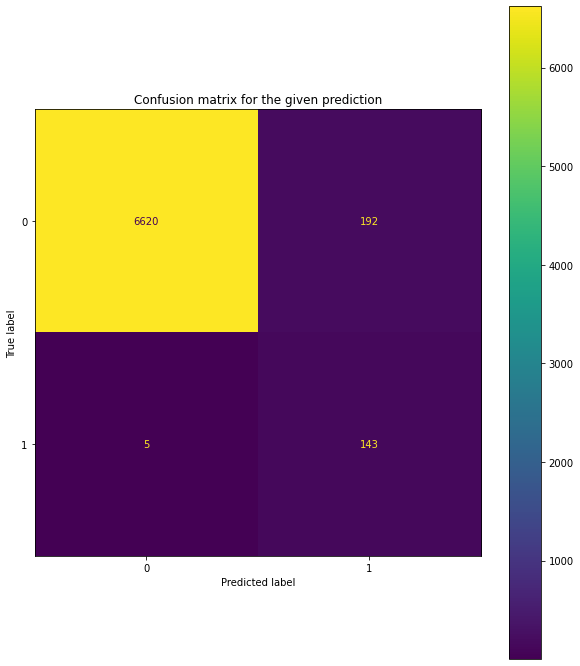

In [47]:
# Evaluating the model
evaluation(y_test,y_pred)

#### We can observe that Losgistic Regression performs better than Decision Tree. We will now see whether bossting methods actually have a positive effect on the undersampled data.

# Boosting

In [48]:
# For the boosting technique we will use the lightgbm framework

In [49]:
lgbm=LGBMClassifier() # Going with default parameters
lg_model=lgbm.fit(x_train_sampled,y_train_sampled)
y_pred=lg_model.predict(x_test)

Accuracy Score is: 0.9945402298850575
f1_score is: 0.8841463414634148
Precision is: 0.8055555555555556
Recall is: 0.9797297297297297
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      6812
           1       0.81      0.98      0.88       148

    accuracy                           0.99      6960
   macro avg       0.90      0.99      0.94      6960
weighted avg       1.00      0.99      0.99      6960



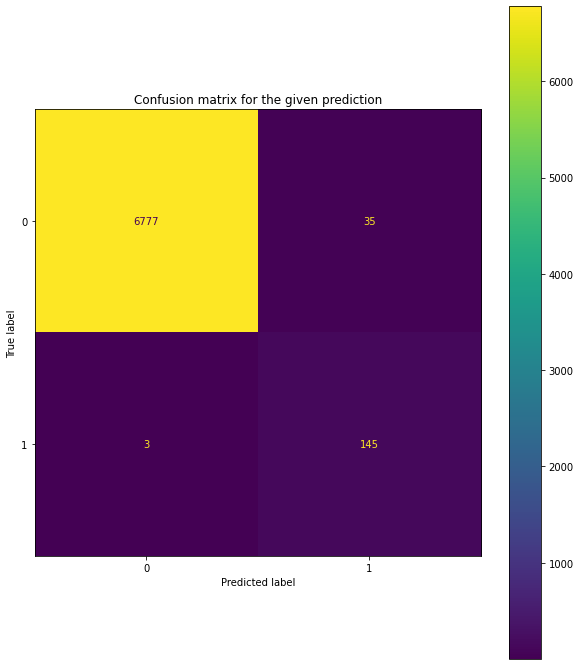

In [50]:
# Model evaluation
evaluation(y_test,y_pred)

#### We observe that the lightgbm model is performing better compared to Decision Tree and logistic regression.

##UnSupervised + Supervised

In [51]:
som_model=MiniSom(10,10,28,sigma=0.5, learning_rate=0.4)
som_model.train(np.array(x_train),50000, verbose=True)

 [ 50000 / 50000 ] 100% - 0:00:00 left 
 quantization error: 2.626622182305201


In [52]:
X_train_quant=som_model.quantization(np.array(x_train))

In [53]:
from sklearn.linear_model import LogisticRegression
LGR_mod_lay = LGBMClassifier(scale_pos_weight=100)
# LGR_mod_lay = LogisticRegression(max_iter=1500)
LGR_mod_lay.fit(X_train_quant,y_train)
LGR_mod_lay_pred=LGR_mod_lay.predict(som_model.quantization(np.array(x_test)))

In [54]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
print('LGC result:')
print('Accuracy: ',accuracy_score(y_test,LGR_mod_lay_pred))
print('f1_score: ', f1_score(y_test,LGR_mod_lay_pred,average='weighted'))
print('Precision: ', precision_score(y_test,LGR_mod_lay_pred,average='weighted'))
print('Recall: ', recall_score(y_test,LGR_mod_lay_pred,average='weighted'))

LGC result:
Accuracy:  0.9110632183908046
f1_score:  0.9386756184076532
Precision:  0.9803888295935437
Recall:  0.9110632183908046


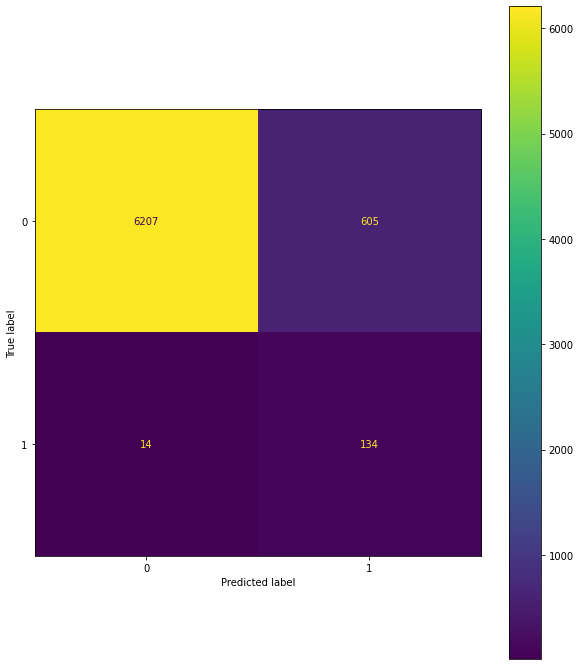

In [55]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(LGR_mod_lay,som_model.quantization(np.array(x_test)),y_test)

#supervised

In [56]:
x_train_sup,y_train_sup=SMOTE().fit_resample(X_train_quant,y_train)

In [57]:
lgbm=LGBMClassifier() # Going with default parameters
model=lgbm.fit(x_train_sup,y_train_sup)
y_pred=model.predict(x_test)

In [58]:
# model=sm.Logit(y_train_sup,x_train_sup).fit()
y_pred_proba=model.predict(x_test)

In [59]:
y_pred=[]

# Taking threshold for probability at 0.5
for i in y_pred_proba:
    if i>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

Accuracy Score is: 0.8288793103448275
f1_score is: 0.15949188426252647
Precision is: 0.08904649330181245
Recall is: 0.7635135135135135
Classification report:
               precision    recall  f1-score   support

           0       0.99      0.83      0.90      6812
           1       0.09      0.76      0.16       148

    accuracy                           0.83      6960
   macro avg       0.54      0.80      0.53      6960
weighted avg       0.97      0.83      0.89      6960



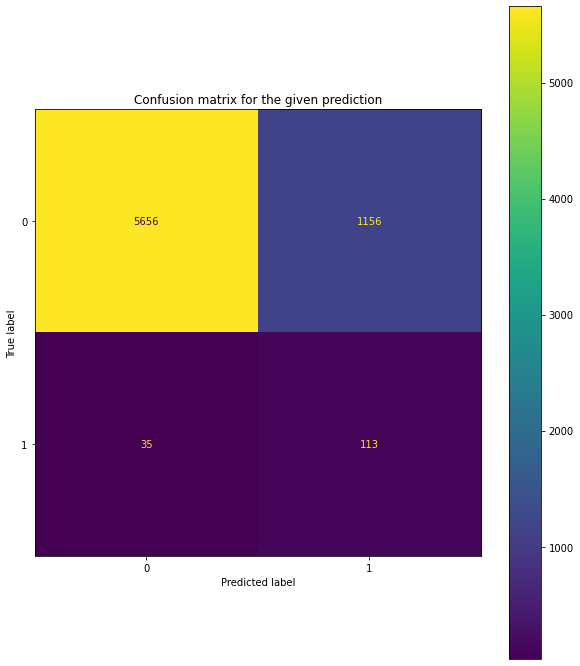

In [60]:
# Evaluation of the model
evaluation(y_test,y_pred)

# Conclusion
* Out of all the models we saw that Boosting methods(LGBMClassifier) and Base Logistic regression model(Here we didn'y apply undersampling) worked the best for us.
* The best method to solve the given problem was applying an undersampling technique and then applying Boosting methods(LGBMClassifier).